Importa o modelo a ser fatiado e mapeado

In [1]:
import matplotlib.pyplot as plt
import gui
import files
from timer import Timer
from components.layer import Layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
choice = gui.ask_load_or_begin()
if choice == "Novo Projeto":
    path_input, file_name = gui.load_model(folders)
    [dpi, layer_height] = gui.ask_parameters_input()
    with Timer("Fase 0: "):
        Layer.create_layers(folders, path_input, file_name, dpi, layer_height)
elif choice == "Carregar Salvo":
    gui.find_saved_file(folders)
elif choice == "Cancelar":
    quit

#TODO: encontrar uma forma de jogar layerHight para o slicing W/images (POSSIVELMENTE COM O RUNSINGLEMODEL)

Fase 0: 
criando as camadas
First arg: /home/matheus/Downloads/Tangran3/TangranV2/input/stl_models/cubo70.STL
Second arg: 300.0
Script executed from: /home/matheus/Downloads/Tangran3/TangranV2
Script executed from: /home/matheus/Downloads/Tangran3/TangranV2/input/sliced
Script executed from: /home/matheus/Downloads/Tangran3/TangranV2
Script executed from: /home/matheus/Downloads/Tangran3/TangranV2/slicing-with-images
number of degenerated triangles = 0
eps = 0.004
max thickness = 2
rounded plane spacing spacing = 2
model zmin = 0, model zmax = 20, first plane Z = -1.996, number of planes = 12
-Incremental, cubo70.STL, thickness = 2, #T = 176, #P = 10, #S = 880, 0.000374s (slicing), 0.001287s (polygon assembling), 0.007506s (total), *K: 5


rm: cannot remove '*.svg': No such file or directory
rm: cannot remove '*.png': No such file or directory




writing image: ../input/sliced/layer_000.pgm


writing image: ../input/sliced/layer_001.pgm


writing image: ../input/sliced/layer_002.pgm


writing image: ../input/sliced/layer_003.pgm


writing image: ../input/sliced/layer_004.pgm


writing image: ../input/sliced/layer_005.pgm


writing image: ../input/sliced/layer_006.pgm


writing image: ../input/sliced/layer_007.pgm


writing image: ../input/sliced/layer_008.pgm


writing image: ../input/sliced/layer_009.pgm


writing output file: out_3d.svg
... done


Total de [criando as camadas] : 2.4115054607391357
salvando as camadas
Total de [salvando as camadas] : 0.3274118900299072
Total de [Fase 0: ] : 2.7403225898742676


Paredes Finas

In [2]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
[nozzle_diam_internal,nozzle_diam_external] = gui.ask_parameters_thin_walls()
camadas = folders.load_layers_hdf5()
for i,c in enumerate(camadas):
    with Timer("Fase 1: Camada: " + str(i)):
        folders.load_islands_hdf5(c)
        c.make_thin_walls(folders, nozzle_diam_external, nozzle_diam_internal)
        %reset_selective -f "c"
%reset_selective -f "camadas"
# TODO: arvore de paredes finas
# TODO: quando duas áreas se encontram
# TODO: limite de parede diam minimo
# TODO: anotar todos os (não fechou contorno)
# TODO arrumar para origens extremamente pequenas, ignorar da problema
# TODO arrumar casos onde a beirada esta vazndo criando areas triangulares distantes
# FIXME: Precisa mesmo separar linha 1 2 topo e baixo? muitos elementos estão sendo criados

Fase 1: Camada: 0
Criando paredes finas
Total de [Criando paredes finas] : 3.4078383445739746
Retirando Paredes finas da camada
Total de [Retirando Paredes finas da camada] : 0.001390695571899414
salvando imagens das regiões
ERRO: não deletou a coisa
Total de [salvando imagens das regiões] : 0.03295636177062988
Total de [Fase 1: Camada: 0] : 3.457174777984619
Fase 1: Camada: 1
Criando paredes finas
Total de [Criando paredes finas] : 2.9761953353881836
Retirando Paredes finas da camada
Total de [Retirando Paredes finas da camada] : 0.0003008842468261719
salvando imagens das regiões
ERRO: não deletou a coisa
Total de [salvando imagens das regiões] : 0.02253437042236328
Total de [Fase 1: Camada: 1] : 3.00640606880188
Fase 1: Camada: 2
Criando paredes finas
Total de [Criando paredes finas] : 3.1129329204559326
Retirando Paredes finas da camada
Total de [Retirando Paredes finas da camada] : 0.0023894309997558594
salvando imagens das regiões
ERRO: não deletou a coisa
Total de [salvando image

Contornos

In [3]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
[void_max,internal_max,external_max] = gui.ask_parameters_offsets()
camadas = folders.load_layers_hdf5()
for i,c in enumerate(camadas):
    with Timer("Fase 2: Camada: " + str(i)):
        folders.load_islands_hdf5(c)
        c.make_offsets(folders, void_max, external_max, internal_max)
        folders.save_props_hdf5(f"/{c.name}",c.__dict__)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 2: Camada: 0
Criando Lvls
Ilha: I_000 Número de Níveis: 2
Total de [Criando Lvls] : 2.3053762912750244
Criando os loops
Total de [Criando os loops] : 0.7444512844085693
Criando regiões de influência
Total de [Criando regiões de influência] : 0.046097755432128906
Criando as regiões de Offset
Total de [Criando as regiões de Offset] : 0.5637075901031494
Retirando regiões da camada
['Lvl_000', 0, 0] Perdendo total:3227 maior void:0.3069608216051731Bw -> aceito
['Lvl_000', 1, 0] Perdendo total:0 maior void:0Bw -> aceito
['Lvl_001', 0, 0] Perdendo total:28348 maior void:9.548117154811715Bw -> bloqueado
['Lvl_001', 0, 1] Perdendo total:28348 maior void:9.547736782046405Bw -> bloqueado
['Lvl_001', 0, 2] Perdendo total:4921 maior void:0.5968048687713959Bw -> bloqueado
['Lvl_001', 0, 3] Perdendo total:51395 maior void:9.475846329402815Bw -> bloqueado
Total de [Retirando regiões da camada] : 0.22851347923278809
Reunindo todos os loops em uma unica imagem
Total de [Reunindo todos os loops em 

Pontes

In [1]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd
import numpy as np
from components import images_tools as it

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
[n_max, nozzle_diam_internal] = gui.ask_parameters_bridges()
camadas = folders.load_layers_hdf5()
last_prohibited_areas = np.zeros(camadas[0].base_frame)
for i,c in enumerate(camadas):
    with Timer("Fase 3: Camada: " + str(i)):
        if i%2 == 1:
            last_image = it.rotate_img_cw(last_prohibited_areas )
        elif i%2 == 0:
            last_image = it.rotate_img_ccw(last_prohibited_areas )
        if i >= 2:
            if i%2 == 1:
                second_last_image = it.rotate_img_cw(camadas[i - 1].prohibited_areas)
            elif i%2 == 0:
                second_last_image = it.rotate_img_ccw(camadas[i - 1].prohibited_areas)
        else:
            second_last_image = np.zeros_like(last_image)
        c.prohibited_areas = last_image
        sum_prohibited_areas = it.sum_imgs([last_image, second_last_image])
        last_prohibited_areas = c.make_bridges(n_max, nozzle_diam_internal, folders, len(camadas), sum_prohibited_areas)
        folders.save_props_hdf5(f"/{c.name}",c.__dict__)
        # %reset_selective -f "c" 
# %reset_selective -f "camadas"

Fase 3: Camada: 0
Criando pontes de Offset
Total de [Criando pontes de Offset] : 1.652461051940918
Criando pontes de Zigzag
Fechou uma ponte OK
Total de [Criando pontes de Zigzag] : 5.138476610183716
Criando pontes de Crossover
Elemento: ('Reg_000', 'Reg_001') Maior prioridade: 0
Total de [Criando pontes de Crossover] : 0.10337018966674805
Retirando pontes da Camada
Total de [Retirando pontes da Camada] : 0.010692119598388672
Gerando áreas proibidas
Total de [Gerando áreas proibidas] : 0.0002875328063964844
salvando imagens das regiões
deletado: /L_000/I_000/bridges
ERRO: não deletou a coisa
Total de [salvando imagens das regiões] : 0.10115981101989746
Total de [Fase 3: Camada: 0] : 7.049206972122192
Fase 3: Camada: 1
Criando pontes de Offset
Total de [Criando pontes de Offset] : 1.5637004375457764
Criando pontes de Zigzag
Fechou uma ponte OK
Total de [Criando pontes de Zigzag] : 4.88023042678833
Criando pontes de Crossover
Elemento: ('Reg_000', 'Reg_001') Maior prioridade: 0
Total de 

Zigzags

In [2]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5() 
for i, c in enumerate(camadas):
    with Timer("Fase 4: Camada: " + str(i)):
        c.make_zigzags(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"


Fase 4: Camada: 0
Encontrando areas monotonicas
Total de [Encontrando areas monotonicas] : 2.7835705280303955
salvando imagens das regiões
deletado: /L_000/I_000/zigzags
Total de [salvando imagens das regiões] : 0.004037141799926758
Total de [Fase 4: Camada: 0] : 2.8326098918914795
Fase 4: Camada: 1
Encontrando areas monotonicas
Total de [Encontrando areas monotonicas] : 2.7545337677001953
salvando imagens das regiões
deletado: /L_001/I_000/zigzags
Total de [salvando imagens das regiões] : 0.004660129547119141
Total de [Fase 4: Camada: 1] : 2.801647424697876
Fase 4: Camada: 2
Encontrando areas monotonicas
Total de [Encontrando areas monotonicas] : 2.6732685565948486
salvando imagens das regiões
deletado: /L_002/I_000/zigzags
Total de [salvando imagens das regiões] : 0.004022836685180664
Total de [Fase 4: Camada: 2] : 2.7199366092681885
Fase 4: Camada: 3
Encontrando areas monotonicas
Total de [Encontrando areas monotonicas] : 2.7307932376861572
salvando imagens das regiões
deletado: /L_

Fase 4: Camada: 0


Total de [Fase 4: Camada: 0] : 0.11681294441223145
Fase 4: Camada: 1


Total de [Fase 4: Camada: 1] : 0.10903286933898926
Fase 4: Camada: 2


Total de [Fase 4: Camada: 2] : 0.10540318489074707
Fase 4: Camada: 3


Total de [Fase 4: Camada: 3] : 0.10459780693054199
Fase 4: Camada: 4


Total de [Fase 4: Camada: 4] : 0.10826420783996582
Fase 4: Camada: 5


Total de [Fase 4: Camada: 5] : 0.10567998886108398
Fase 4: Camada: 6


Total de [Fase 4: Camada: 6] : 0.10713553428649902
Fase 4: Camada: 7


Total de [Fase 4: Camada: 7] : 0.10708165168762207
Fase 4: Camada: 8


Total de [Fase 4: Camada: 8] : 0.10535311698913574
Fase 4: Camada: 9


Total de [Fase 4: Camada: 9] : 0.1106252670288086


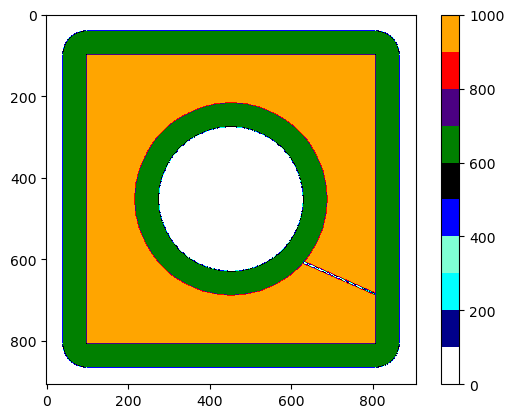

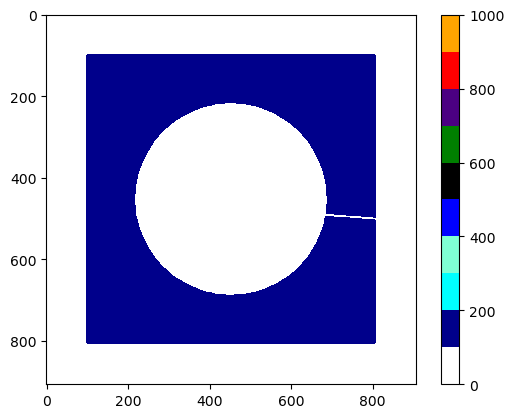

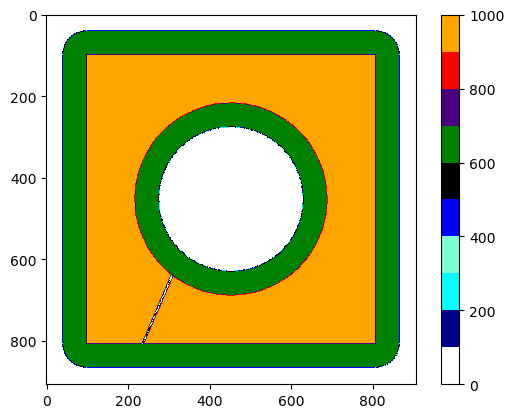

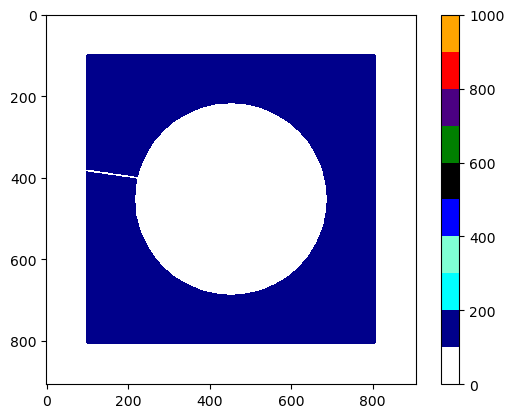

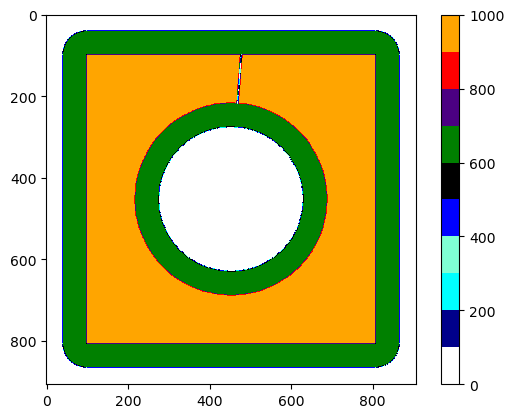

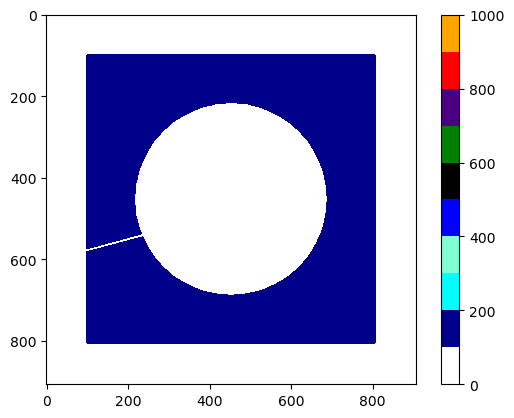

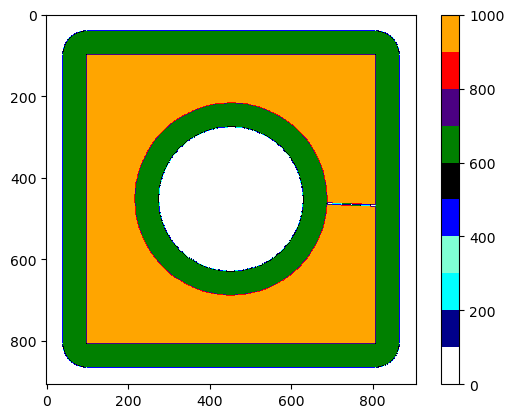

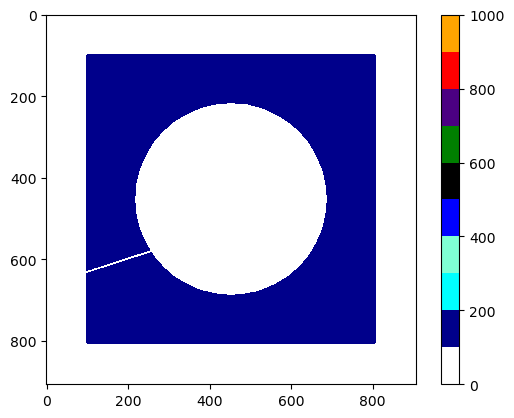

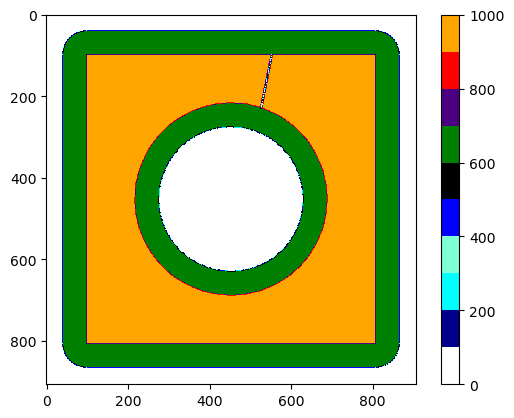

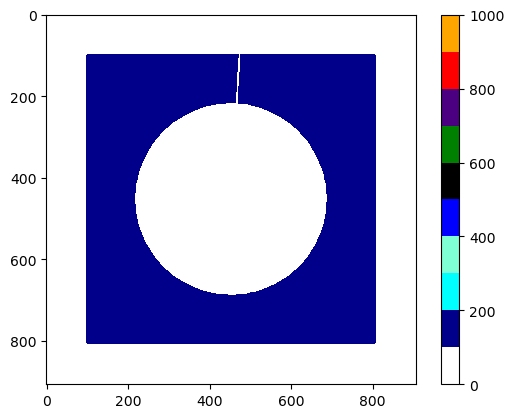

In [3]:
import gui
import files
from timer import Timer
from components import images_tools as it
from os import getcwd
import matplotlib.pyplot as plt
import matplotlib.colors
import os

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5() 
for c in camadas:
    folders.load_islands_hdf5(c)
tangran_cmap = matplotlib.colors.ListedColormap(["white","darkblue","aqua","aquamarine","blue","black","green","indigo","red","orange"])
for i, c in enumerate(camadas):
    with Timer("Fase 4: Camada: " + str(i)):
        plt.figure()
        img_mapping = it.final_mapping(c, folders)
        if i%2 == 1:
            img_mapping = it.rotate_img_ccw(img_mapping )
        plt.imshow(img_mapping, cmap=tangran_cmap, vmin=0, vmax=1000)
        # plt.imsave("aaa.png",img_mapping, cmap=tangran_cmap, vmin=0, vmax=1000)
        plt.colorbar()
        print('\n')

ROTAS

Rotas de Offset

In [4]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

amendment_size = 0.7 #porcentagem do tamanho da poca de deposicao de material
for c in camadas:
    with Timer("Making offset routes"):
        c.make_offset_routes(amendment_size, folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.04838204383850098
Total de [Making offset routes] : 1.971043348312378
Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.04357337951660156
Total de [Making offset routes] : 1.9929957389831543
Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.061036109924316406
Total de [Making offset routes] : 1.9865436553955078
Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.04378819465637207
Total de [Making offset routes] : 1.9596095085144043
Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.050786495208740234
Total de [Making offset routes] : 1.979447841644287
Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.051567792892456055
Total de [Making offset routes] : 1.9835455417633057
Making offset routes
salvando ima

Rotas de pontes

In [5]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()
for c in camadas:
    with Timer("Making bridges routes"):
        c.make_bridges_routes(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Making bridges routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.07956051826477051
Total de [Making bridges routes] : 3.081890106201172
Making bridges routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.0780031681060791
Total de [Making bridges routes] : 5.919559478759766
Making bridges routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.07920980453491211
Total de [Making bridges routes] : 2.8401825428009033
Making bridges routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.07798004150390625
Total de [Making bridges routes] : 5.967998027801514
Making bridges routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.08955812454223633
Total de [Making bridges routes] : 6.004241943359375
Making bridges routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.08850288391113281
Total de [Making bridges routes] : 5.928247690200806
Making bridges routes
salvan

Rotas de Ziguezague

In [6]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()
for c in camadas:
    with Timer("Making zigzag routes"):
        c.make_zigzag_routes(folders)
        c.connect_zigzags(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"



Making zigzag routes
criando as rotas de zigzag, camada:L_000
Total de [criando as rotas de zigzag, camada:L_000] : 0.0005397796630859375
salvando imagens das rotas
deletado: /L_000/I_000/zigzags
Total de [salvando imagens das rotas] : 0.004440784454345703
Criando os grafos de regiões
Total de [Criando os grafos de regiões] : 0.001483917236328125
Conectando regiões de zigzag
Total de [Conectando regiões de zigzag] : 0.0012183189392089844
salvando grafos
Total de [salvando grafos] : 0.05313920974731445
Total de [Making zigzag routes] : 0.12626957893371582
Making zigzag routes
criando as rotas de zigzag, camada:L_001
Total de [criando as rotas de zigzag, camada:L_001] : 0.0005753040313720703
salvando imagens das rotas
deletado: /L_001/I_000/zigzags
Total de [salvando imagens das rotas] : 0.003791332244873047
Criando os grafos de regiões
Total de [Criando os grafos de regiões] : 0.0014657974243164062
Conectando regiões de zigzag
Total de [Conectando regiões de zigzag] : 0.0017247200012207

WEAVING

In [7]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()
[iwflag] = gui.ask_parameters_weaving()
for c in camadas:
    with Timer("Fase 5 b"):
        c.internal_weaving(iwflag, folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 5 b
gerando preenchimentos oscilatórios
Total de [gerando preenchimentos oscilatórios] : 0.9768846035003662
salvando rotas
deletado: /L_000/I_000/zigzags/macro_areas
Total de [salvando rotas] : 0.09493207931518555
Total de [Fase 5 b] : 1.0727002620697021
Fase 5 b
gerando preenchimentos oscilatórios
Total de [gerando preenchimentos oscilatórios] : 0.97607421875
salvando rotas
deletado: /L_001/I_000/zigzags/macro_areas
Total de [salvando rotas] : 0.0938408374786377
Total de [Fase 5 b] : 1.0706040859222412
Fase 5 b
gerando preenchimentos oscilatórios
Total de [gerando preenchimentos oscilatórios] : 1.042515754699707
salvando rotas
deletado: /L_002/I_000/zigzags/macro_areas
Total de [salvando rotas] : 0.10240602493286133
Total de [Fase 5 b] : 1.145542860031128
Fase 5 b
gerando preenchimentos oscilatórios
Total de [gerando preenchimentos oscilatórios] : 1.0596044063568115
salvando rotas
deletado: /L_003/I_000/zigzags/macro_areas
Total de [salvando rotas] : 0.09428524971008301
Total de 

Rotas de Thin Walls

In [8]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()
for c in camadas:
    with Timer("Fase 5"):
        with Timer("Making thin walls routes"):
            c.make_thin_wall_routes(folders)
            %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 5
Making thin walls routes
criando rotas TW
Total de [criando rotas TW] : 0.023415803909301758
salvando imagens das rotas
Total de [salvando imagens das rotas] : 6.9141387939453125e-06
Total de [Making thin walls routes] : 0.023653507232666016
Total de [Fase 5] : 0.023766279220581055
Fase 5
Making thin walls routes
criando rotas TW
Total de [criando rotas TW] : 0.01966404914855957
salvando imagens das rotas
Total de [salvando imagens das rotas] : 6.67572021484375e-06
Total de [Making thin walls routes] : 0.01994466781616211
Total de [Fase 5] : 0.01996326446533203
Fase 5
Making thin walls routes
criando rotas TW
Total de [criando rotas TW] : 0.0212554931640625
salvando imagens das rotas
Total de [salvando imagens das rotas] : 5.7220458984375e-06
Total de [Making thin walls routes] : 0.021503686904907227
Total de [Fase 5] : 0.021521806716918945
Fase 5
Making thin walls routes
criando rotas TW
Total de [criando rotas TW] : 0.020306825637817383
salvando imagens das rotas
Total de [sal

Unificando rotas EXTERNAS nas camadas

In [9]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

for c in camadas:
    with Timer("Fase 6"):
        c.close_routes_external(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"
    

Fase 6
Conectando rotas externas
Conectando pontes de Offset
Total de [Conectando pontes de Offset] : 0.16826176643371582
Conectando pontes de Crossover
salto:  [613, 583]
Total de [Conectando pontes de Crossover] : 0.7744162082672119
Total de [Conectando rotas externas] : 1.0805482864379883
salvando imagens das rotas
ERRO: não deletou a coisa
ERRO: não deletou a coisa
Total de [salvando imagens das rotas] : 0.08478736877441406
Total de [Fase 6] : 1.1657216548919678
Fase 6
Conectando rotas externas
Conectando pontes de Offset
Total de [Conectando pontes de Offset] : 0.0751807689666748
Conectando pontes de Crossover
salto:  [652, 399]
Total de [Conectando pontes de Crossover] : 4.532459497451782
Total de [Conectando rotas externas] : 4.738506078720093
salvando imagens das rotas
ERRO: não deletou a coisa
ERRO: não deletou a coisa
Total de [salvando imagens das rotas] : 0.07123088836669922
Total de [Fase 6] : 4.810113906860352
Fase 6
Conectando rotas externas
Conectando pontes de Offset
T

Unificando rotas INTERNAS nas camadas

In [10]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

for c in camadas:
    with Timer("Fase 7"):
        c.close_routes_internal(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 7
Conectando zgzags vizinhos
Total de [Conectando zgzags vizinhos] : 0.0002346038818359375
Conectando pontes de zigzag
Total de [Conectando pontes de zigzag] : 1.1920928955078125e-05
Total de [Fase 7] : 0.1313190460205078


IndexError: list index out of range

Unindo rotas de thin walls

In [ ]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

for c in camadas:
    with Timer("Fase 8"):
        c.close_routes_thinwalls(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 8
Convertendo paredes finas
Total de [Convertendo paredes finas] : 0.0013780593872070312
salvando imagens das rotas
deletado: /L_000/I_000/thinwalls_tree_route/sequence
deletado: /L_000/I_000/thinwalls_tree_route/saltos
Total de [salvando imagens das rotas] : 0.07522964477539062
Total de [Fase 8] : 0.12674665451049805
Fase 8
Convertendo paredes finas
Total de [Convertendo paredes finas] : 0.0004904270172119141
salvando imagens das rotas
deletado: /L_001/I_000/thinwalls_tree_route/sequence
deletado: /L_001/I_000/thinwalls_tree_route/saltos
Total de [salvando imagens das rotas] : 0.0744168758392334
Total de [Fase 8] : 0.1054389476776123
Fase 8
Convertendo paredes finas
Total de [Convertendo paredes finas] : 0.0005552768707275391
salvando imagens das rotas
deletado: /L_002/I_000/thinwalls_tree_route/sequence
deletado: /L_002/I_000/thinwalls_tree_route/saltos
Total de [salvando imagens das rotas] : 0.10245633125305176
Total de [Fase 8] : 0.1381826400756836
Fase 8
Convertendo paredes f

Unindo todas as rotas

In [ ]:
import gui
import files
from timer import Timer
from components import layer, path_tools
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

for c in camadas:
    c.close_final_path(folders)

%reset_selective -f "camadas"


Encontrando ponto de união ext-int
Total de [Encontrando ponto de união ext-int] : 13.370703220367432
Conectando ambas as partes
Total de [Conectando ambas as partes] : 0.0031616687774658203
salvando imagens das rotas
deletado: /L_000/I_000/island_route
ERRO: não deletou a coisa
[[247, 170], [247, 466], [249, 487], [256, 514], [268, 543], [285, 572], [302, 593], [329, 618], [357, 635], [389, 649], [419, 656], [445, 659], [481, 657], [515, 650], [550, 635], [573, 621], [594, 604], [604, 594], [621, 573], [635, 550], [649, 518], [656, 488], [659, 462], [659, 445], [656, 419], [650, 392], [638, 363], [621, 333], [593, 302], [572, 285], [549, 271], [517, 257], [487, 249], [466, 247], [440, 247], [420, 249], [396, 255], [368, 266], [345, 278], [328, 289], [306, 309], [305, 308], [305, 70], [306, 69], [808, 69], [815, 70], [824, 74], [832, 82], [836, 91], [837, 98], [837, 808], [836, 815], [832, 824], [824, 832], [815, 836], [808, 837], [98, 837], [91, 836], [82, 832], [74, 824], [70, 815], 

Gerando o Código G

In [ ]:
import gui
import files
from timer import Timer
from components import layer, path_tools
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
[vel_int, vel_ext, vel_thin_wall, p_religamento, p_desligamento, vel_vazio, p_entre_camadas, substratoy, substratox, cortey, cortex] = gui.ask_parameters_Gcode()
coords_substrato = [substratoy, substratox]
coords_corte = [cortey, cortex]
camadas = folders.load_layers_hdf5()

#layer_heights = [10+2.9+3+(i*1.5) for i,x in enumerate(camadas)]
layer_heights = [8+2+(i*1.3) for i,x in enumerate(camadas)]
with Timer("Cuspindo o Gcode"):
    path_tools.layers_to_Gcode(camadas, 
                               folders, 
                               vel_int,
                               vel_ext, 
                               vel_thin_wall, 
                               p_religamento,
                               p_desligamento,
                               vel_vazio,
                               p_entre_camadas,
                               layer_heights,
                               coords_substrato,
                               coords_corte,
                               )
%reset_selective -f "camadas"

Cuspindo o Gcode
nome: L_000/I_000
[[247, 170], [247, 466], [249, 487], [256, 514], [268, 543], [285, 572], [302, 593], [329, 618], [357, 635], [389, 649], [419, 656], [445, 659], [481, 657], [515, 650], [550, 635], [573, 621], [594, 604], [604, 594], [621, 573], [635, 550], [649, 518], [656, 488], [659, 462], [659, 445], [656, 419], [650, 392], [638, 363], [621, 333], [593, 302], [572, 285], [549, 271], [517, 257], [487, 249], [466, 247], [440, 247], [420, 249], [396, 255], [368, 266], [345, 278], [328, 289], [306, 309], [305, 308], [305, 70], [306, 69], [808, 69], [815, 70], [824, 74], [832, 82], [836, 91], [837, 98], [837, 808], [836, 815], [832, 824], [824, 832], [815, 836], [808, 837], [98, 837], [91, 836], [82, 832], [74, 824], [70, 815], [69, 808], [69, 98], [70, 91], [74, 82], [78, 77], [88, 71], [98, 69], [246, 69], [247, 70], [247, 169], [0, 0], [190, 170], [194, 170], [195, 171], [195, 211], [194, 212], [171, 212], [170, 211], [170, 171], [171, 170], [189, 170], [0, 0]]
troc

In [ ]:
import numpy as np
camadas = folders.load_layers_hdf5()
for c in camadas:
    folders.load_islands_hdf5(c)
    for isl in c.islands:
        folders.load_island_paths_hdf5(c.name, isl)
        internal_trees = [list(x) for x in isl.internal_tree_route.sequence]
        print(internal_trees)
print([235,807] in internal_trees)

[[194, 212], [193, 212], [192, 212], [191, 212], [190, 212], [189, 212], [188, 212], [187, 212], [186, 212], [185, 212], [184, 212], [183, 212], [182, 212], [181, 212], [180, 212], [179, 212], [178, 212], [177, 212], [176, 212], [175, 212], [174, 212], [173, 212], [172, 212], [171, 212], [170, 211], [170, 210], [170, 209], [170, 208], [170, 207], [170, 206], [170, 205], [170, 204], [170, 203], [170, 202], [170, 201], [170, 200], [170, 199], [170, 198], [170, 197], [170, 196], [170, 195], [170, 194], [170, 193], [170, 192], [170, 191], [170, 190], [170, 189], [170, 188], [170, 187], [170, 186], [170, 185], [170, 184], [170, 183], [170, 182], [170, 181], [170, 180], [170, 179], [170, 178], [170, 177], [170, 176], [170, 175], [170, 174], [170, 173], [170, 172], [170, 171], [171, 170], [172, 170], [173, 170], [174, 170], [175, 170], [176, 170], [177, 170], [178, 170], [179, 170], [180, 170], [181, 170], [182, 170], [183, 170], [184, 170], [185, 170], [186, 170], [187, 170], [188, 170], [18

In [ ]:
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# import numpy as np

# # Lista de imagens binárias (exemplo com arrays numpy)
# imagens = [
#     img_mapping,
#     img_mapping,
#     img_mapping
# ]

# # Lista de alturas no eixo z
# alturas = [0, 10, 20]

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# for img, z in zip(imagens, alturas):
#     x = np.linspace(0, img.shape[1], img.shape[1])
#     y = np.linspace(0, img.shape[0], img.shape[0])
#     x, y = np.meshgrid(x, y)
#     z = np.full_like(x, z)
#     ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=plt.cm.gray(img), shade=False)

# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')
# plt.show()


In [ ]:
# import gui
# import files
# from timer import Timer
# from components import layer, path_tools
# from os import getcwd

# if not('folders' in globals()):
#     home = getcwd()
#     folders = files.System_Paths(home)
#     gui.find_saved_file(folders)
# camadas = folders.load_layers_hdf5()

# file_name = gui.find_saved_file(folders)
# path_tools.layers_to_Gcode_FFF(camadas, folders, file_name)

In [ ]:
class TrafficLightState:
    """Base class for traffic light states."""
    def change(self, traffic_light):
        raise NotImplementedError("This method should be overridden by subclasses")


class RedState(TrafficLightState):
    """State representing the red light."""
    def change(self, traffic_light):
        print("Changing from Red to Green")
        traffic_light.state = GreenState()


class YellowState(TrafficLightState):
    """State representing the yellow light."""
    def change(self, traffic_light):
        print("Changing from Yellow to Red")
        traffic_light.state = RedState()


class GreenState(TrafficLightState):
    """State representing the green light."""
    def change(self, traffic_light):
        print("Changing from Green to Yellow")
        traffic_light.state = YellowState()


class TrafficLight:
    """Traffic light class that uses a state machine."""
    def __init__(self):
        self.state = RedState()  # Initial state

    def change(self):
        """Change the state of the traffic light."""
        self.state.change(self)

    def __str__(self):
        return f"Current state: {self.state.__class__.__name__}"


# Example usage
if __name__ == "__main__":
    traffic_light = TrafficLight()
    
    # Simulate the traffic light changing states
    for _ in range(6):  # Change state 6 times
        print(traffic_light)
        traffic_light.change()

Current state: RedState
Changing from Red to Green
Current state: GreenState
Changing from Green to Yellow
Current state: YellowState
Changing from Yellow to Red
Current state: RedState
Changing from Red to Green
Current state: GreenState
Changing from Green to Yellow
Current state: YellowState
Changing from Yellow to Red


In [ ]:
import numpy as np
import cv2  # Assuming you are using OpenCV for image processing

def bobobo(image1, image2):
    """A placeholder function that performs some operation on two images."""
    # For demonstration, let's just return the absolute difference between the two images
    return cv2.absdiff(image1, image2)

def process_images(image_list):
    """Process a list of images, comparing the last two with the current image."""
    for i in range(len(image_list)):
        current_image = image_list[i]
        
        # Check if there are at least two previous images to compare
        if i >= 2:
            last_image = image_list[i - 1]
            second_last_image = image_list[i - 2]
            
            # Apply the bobobo function to the current image and the last two images
            result_last = bobobo(current_image, last_image)
            result_second_last = bobobo(current_image, second_last_image)
            
            # Here you can do something with the results, like saving or displaying them
            # For demonstration, we'll just print the shapes of the results
            print(f"Comparing image {i} with last image {i-1}: result shape = {result_last.shape}")
            print(f"Comparing image {i} with second last image {i-2}: result shape = {result_second_last.shape}")

# Example usage
if __name__ == "__main__":
    # Create a list of dummy images (for demonstration purposes)
    # In practice, you would load your images using cv2.imread or similar
    image_list = [np.random.randint(0, 256, (100, 100, 3), dtype=np.uint8) for _ in range(5)]
    
    process_images(image_list)

Comparing image 2 with last image 1: result shape = (100, 100, 3)
Comparing image 2 with second last image 0: result shape = (100, 100, 3)
Comparing image 3 with last image 2: result shape = (100, 100, 3)
Comparing image 3 with second last image 1: result shape = (100, 100, 3)
Comparing image 4 with last image 3: result shape = (100, 100, 3)
Comparing image 4 with second last image 2: result shape = (100, 100, 3)
